### Projet python, NBA

VIctor DUSSAUSSOIS, Iémélian RAMBEAU, Adel EUTAMENE

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [5]:
data_players = pd.read_csv("nba_players.csv")
data_teams = pd.read_csv("nba_teams.csv")

Text(0.5, 1.0, 'Répartition des joueurs par pays')

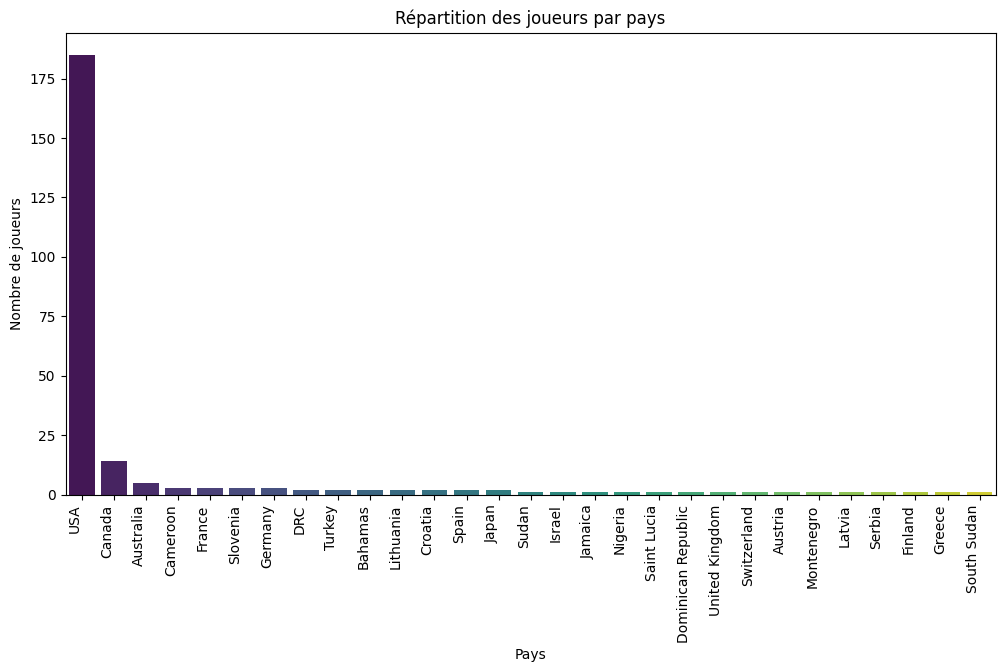

In [ ]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='COUNTRY', data=data_players, palette='viridis', order=data_players['COUNTRY'].value_counts().index)

# Mettre les noms de pays à la verticale
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Ajouter des étiquettes et un titre
plt.xlabel('Pays')
plt.ylabel('Nombre de joueurs')
plt.title('Répartition des joueurs par pays')

On peut voir sur ce graphique, que la majorité des joueurs de la NBA viennent des USA, les autres pays sont représenté  de manière plus uniforme.

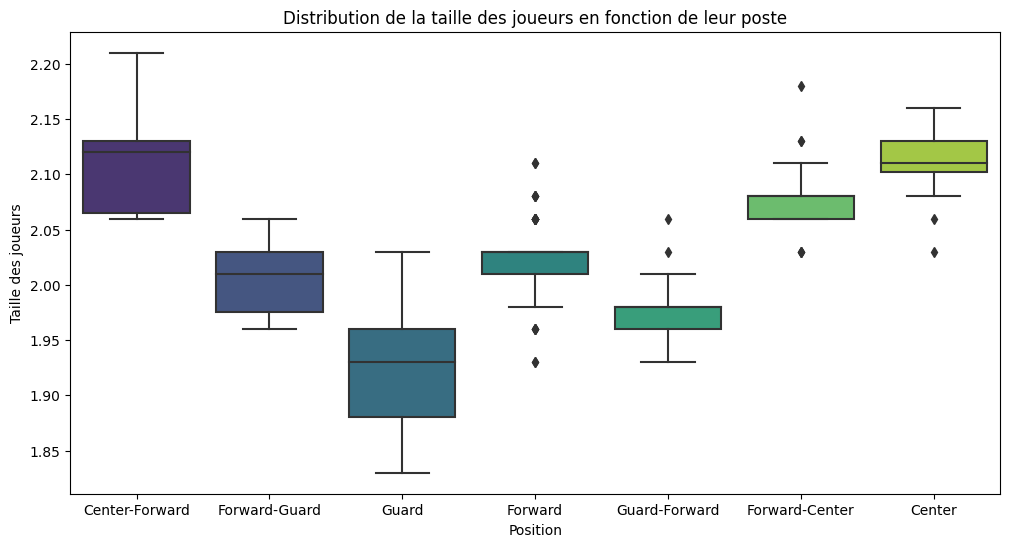

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='POSITION', y='HEIGHT', data=data_players, palette='viridis')

# Mettre les noms de pays à la verticale
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Ajouter des étiquettes et un titre
plt.xlabel('Position')
plt.ylabel('Taille des joueurs')
plt.title('Distribution de la taille des joueurs en fonction de leur poste')

# Afficher le graphique
plt.show()

On peut voir sur ce graphique que des différentes sur la tailles des joueurs en fonction de leurs postes, on peut voir que les pivots son en moyenne les joueurs alors que les meneurs sont les joueurs les plus petits.

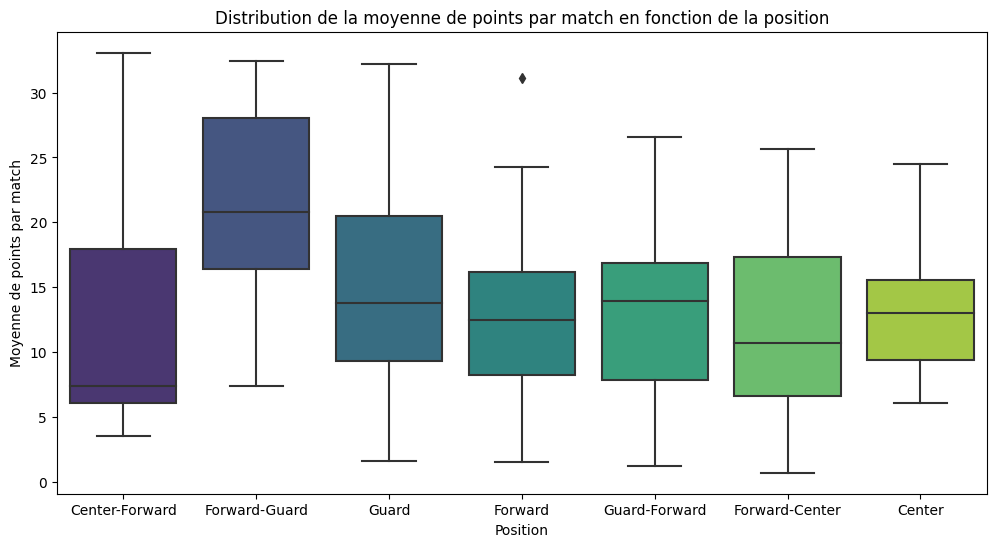

In [ ]:
data_players['AVG_POINTS_PER_GAME'] = (data_players['WINS.PTS'] * data_players['WINS.GP'] +
                                       data_players['LOSSES.PTS'] * data_players['LOSSES.GP']) / (data_players['WINS.GP'] + data_players['LOSSES.GP'])

# Utiliser Seaborn pour créer un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='POSITION', y='AVG_POINTS_PER_GAME', data=data_players, palette='viridis')

# Ajouter des étiquettes et un titre
plt.xlabel('Position')
plt.ylabel('Moyenne de points par match')
plt.title('Distribution de la moyenne de points par match en fonction de la position')

# Afficher le graphique
plt.show()

On peut voir sur ce graphique, qu'en moyenne, les joueurs mettent le même nombre de points quelque soit le poste. Le poste forward gard semble quand même marquer plus de points en moyenne.

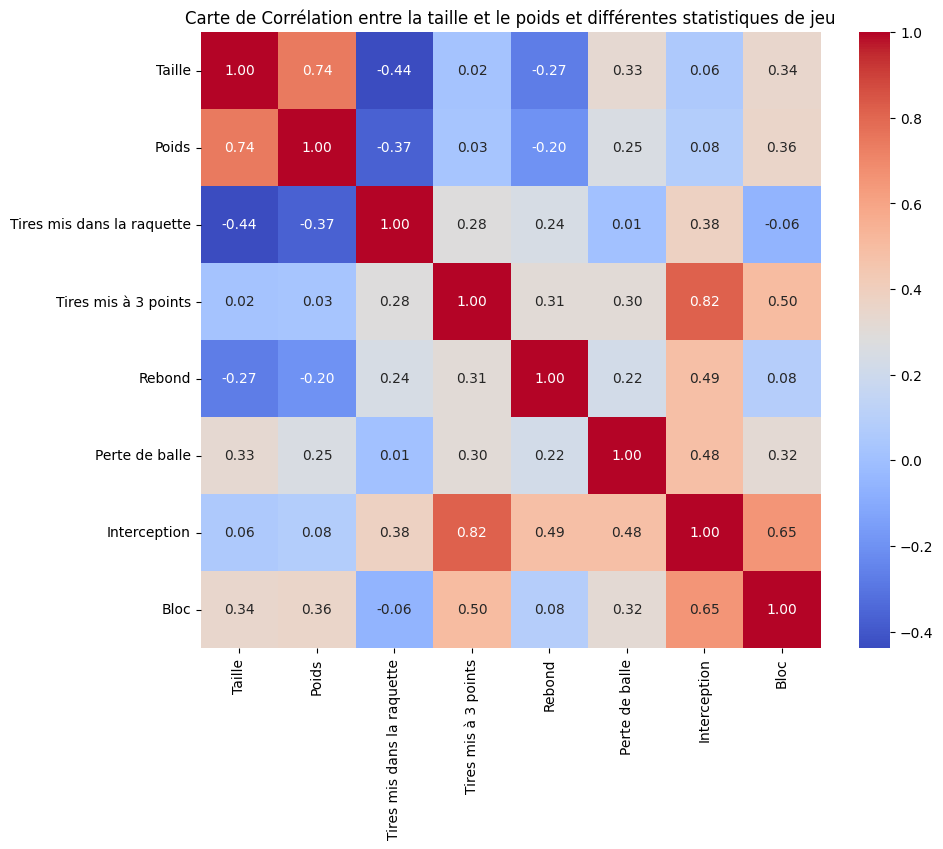

In [ ]:
# Calculer la moyenne des variables spécifiées
data_players['AVG_FGM'] = (data_players['WINS.FGM'] * data_players['WINS.GP'] +
                            data_players['LOSSES.FGM'] * data_players['LOSSES.GP']) / (data_players['WINS.GP'] + data_players['LOSSES.GP'])

data_players['AVG_3PM'] = (data_players['WINS.3PM'] * data_players['WINS.GP'] +
                            data_players['LOSSES.3PM'] * data_players['LOSSES.GP']) / (data_players['WINS.GP'] + data_players['LOSSES.GP'])

data_players['AVG_REB'] = (data_players['WINS.REB'] * data_players['WINS.GP'] +
                            data_players['LOSSES.REB'] * data_players['LOSSES.GP']) / (data_players['WINS.GP'] + data_players['LOSSES.GP'])

data_players['AVG_TOV'] = (data_players['WINS.TOV'] * data_players['WINS.GP'] +
                            data_players['LOSSES.TOV'] * data_players['LOSSES.GP']) / (data_players['WINS.GP'] + data_players['LOSSES.GP'])

data_players['AVG_STL'] = (data_players['WINS.STL'] * data_players['WINS.GP'] +
                            data_players['LOSSES.STL'] * data_players['LOSSES.GP']) / (data_players['WINS.GP'] + data_players['LOSSES.GP'])

data_players['AVG_BLK'] = (data_players['WINS.BLK'] * data_players['WINS.GP'] +
                            data_players['LOSSES.BLK'] * data_players['LOSSES.GP']) / (data_players['WINS.GP'] + data_players['LOSSES.GP'])

# Sélectionner les colonnes nécessaires pour la carte de corrélation
selected_columns = ['HEIGHT', 'WEIGHT', 'AVG_FGM', 'AVG_3PM', 'AVG_REB', 'AVG_TOV', 'AVG_STL', 'AVG_BLK']
correlation_data = data_players[selected_columns]

# Calculer la matrice de corrélation
correlation_matrix = correlation_data.corr()

# Renommer les légendes
correlation_matrix = correlation_matrix.rename(index={'HEIGHT': 'Taille', 'WEIGHT': 'Poids', 'AVG_FGM': 'Tires mis dans la raquette',
                                                     'AVG_3PM': 'Tires mis à 3 points', 'AVG_REB': 'Rebond',
                                                     'AVG_TOV': 'Perte de balle', 'AVG_STL': 'Interception',
                                                     'AVG_BLK': 'Bloc'},
                                               columns={'HEIGHT': 'Taille', 'WEIGHT': 'Poids', 'AVG_FGM': 'Tires mis dans la raquette',
                                                        'AVG_3PM': 'Tires mis à 3 points', 'AVG_REB': 'Rebond',
                                                        'AVG_TOV': 'Perte de balle', 'AVG_STL': 'Interception',
                                                        'AVG_BLK': 'Bloc'})

# Utiliser Seaborn pour créer une carte de corrélation (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Ajouter des étiquettes et un titre
plt.title('Carte de Corrélation entre la taille et le poids et différentes statistiques de jeu')

# Afficher le graphique
plt.show()

L'objectif initial de ce graphique était de trouver une correlation entre la taille ou le poid avec différent aspect du jeu. On peut voir que dans l'ensemble, il n'y a pas beaucoup de correlation (plus proche de 0 que de 1 ou -1). La coorélaiton la plus important que nous pouvons voir sur ce graphique c que les joueurs qui interceptent les ballons, sont aussi souvent des tireurs de 3 points.

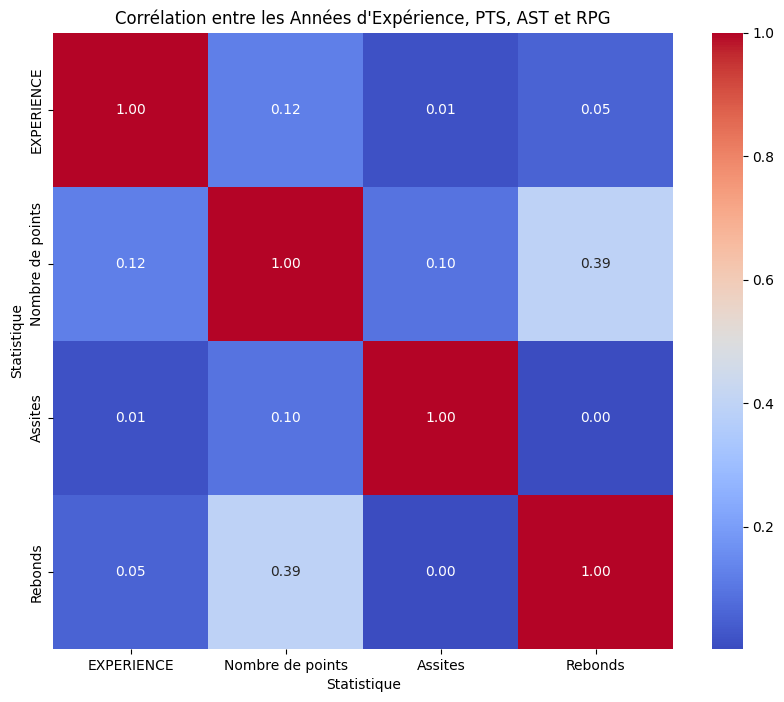

In [ ]:
# Sélectionner les colonnes nécessaires pour le calcul
selected_columns = ['EXPERIENCE', 'WINS.PTS', 'LOSSES.PTS', 'WINS.AST', 'LOSSES.AST', 'WINS.REB', 'LOSSES.REB']

# Calculer la moyenne des statistiques pour chaque joueur
data_players['AVG_PTS'] = (data_players['WINS.PTS'] * data_players['WINS.GP'] +
                           data_players['LOSSES.PTS'] * data_players['LOSSES.GP']) / (data_players['WINS.GP'] + data_players['LOSSES.GP'])

data_players['AVG_AST'] = (data_players['WINS.AST'] * data_players['WINS.GP'] +
                           data_players['LOSSES.AST'] * data_players['LOSSES.GP']) / (data_players['WINS.GP'] + data_players['LOSSES.GP'])

data_players['AVG_REB'] = (data_players['WINS.REB'] * data_players['WINS.GP'] +
                           data_players['LOSSES.REB'] * data_players['LOSSES.GP']) / (data_players['WINS.GP'] + data_players['LOSSES.GP'])

# Sélectionner les colonnes nécessaires pour la corrélation (utiliser double crochets)
correlation_data = data_players[['EXPERIENCE', 'AVG_PTS', 'AVG_AST', 'AVG_REB']]

# Calculer la corrélation
correlation_matrix = correlation_data.corr()

# Renommer les légendes
correlation_matrix = correlation_matrix.rename(index={'AVG_REB': 'Rebonds', 'AVG_AST': 'Assites', 'AVG_PTS': 'Nombre de points'},
                                               columns={'AVG_REB': 'Rebonds', 'AVG_AST': 'Assites', 'AVG_PTS': 'Nombre de points'})

# Utiliser Seaborn pour créer une heatmap de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Ajouter des étiquettes et un titre
plt.title('Corrélation entre les Années d\'Expérience, PTS, AST et RPG')
plt.xlabel('Statistique')
plt.ylabel('Statistique')

# Afficher le graphique
plt.show()

On peut voir sur cette heatmap de correlation que l'experience n'a rien a voir sur les stats.

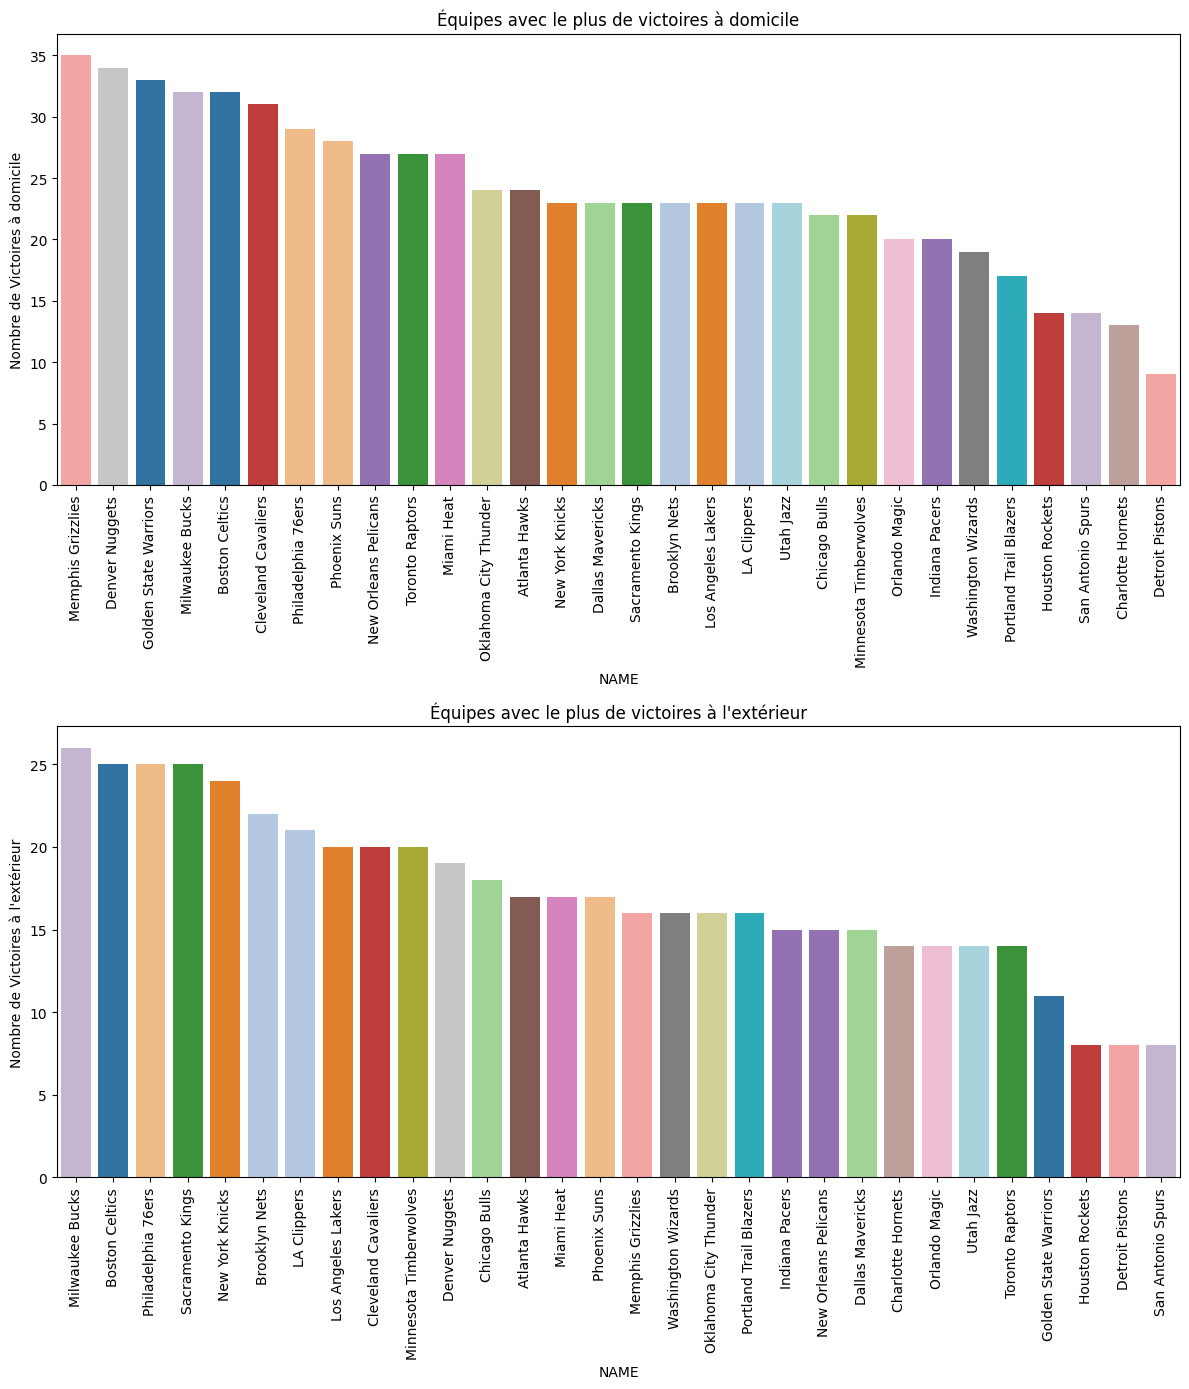

In [ ]:
# Utiliser la palette "tab20" de Seaborn pour obtenir 20 couleurs distinctes
palette = sns.color_palette("tab20", n_colors=len(data_teams['NAME']))

# Étendre la palette à 30 couleurs
extended_palette = palette + sns.color_palette("tab20b", n_colors=30 - len(palette))

# Créer une correspondance entre les équipes et les couleurs
team_colors = dict(zip(data_teams['NAME'], extended_palette))

# Trier le DataFrame par nombre de victoires à domicile (HOME.W) et à l'extérieur (ROAD.W)
sorted_data_home = data_teams.sort_values(by=['HOME.W'], ascending=False)
sorted_data_road = data_teams.sort_values(by=['ROAD.W'], ascending=False)

# Créer une figure avec deux sous-graphiques empilés verticalement
fig, axs = plt.subplots(2, 1, figsize=(12, 14))

# Graphique des victoires à domicile
sns.barplot(x='NAME', y='HOME.W', data=sorted_data_home, palette=team_colors, ax=axs[0])
axs[0].set_title('Équipes avec le plus de victoires à domicile')
axs[0].set_ylabel('Nombre de Victoires à domicile')
axs[0].tick_params(axis='x', rotation=90)  # Faire pivoter les étiquettes de l'axe x

# Graphique des victoires à l'extérieur
sns.barplot(x='NAME', y='ROAD.W', data=sorted_data_road, palette=team_colors, ax=axs[1])
axs[1].set_title('Équipes avec le plus de victoires à l\'extérieur')
axs[1].set_ylabel('Nombre de Victoires à l\'extérieur')
axs[1].tick_params(axis='x', rotation=90)  # Faire pivoter les étiquettes de l'axe x

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

On peut comparer les victoires à domiciles et les victoires à l'extérieurs de toues les équipes de NBA. Cela nous permet de voir notamment les Memphis Grizzlies, très forts à domicile mais beacoup moins à l'extérieur.

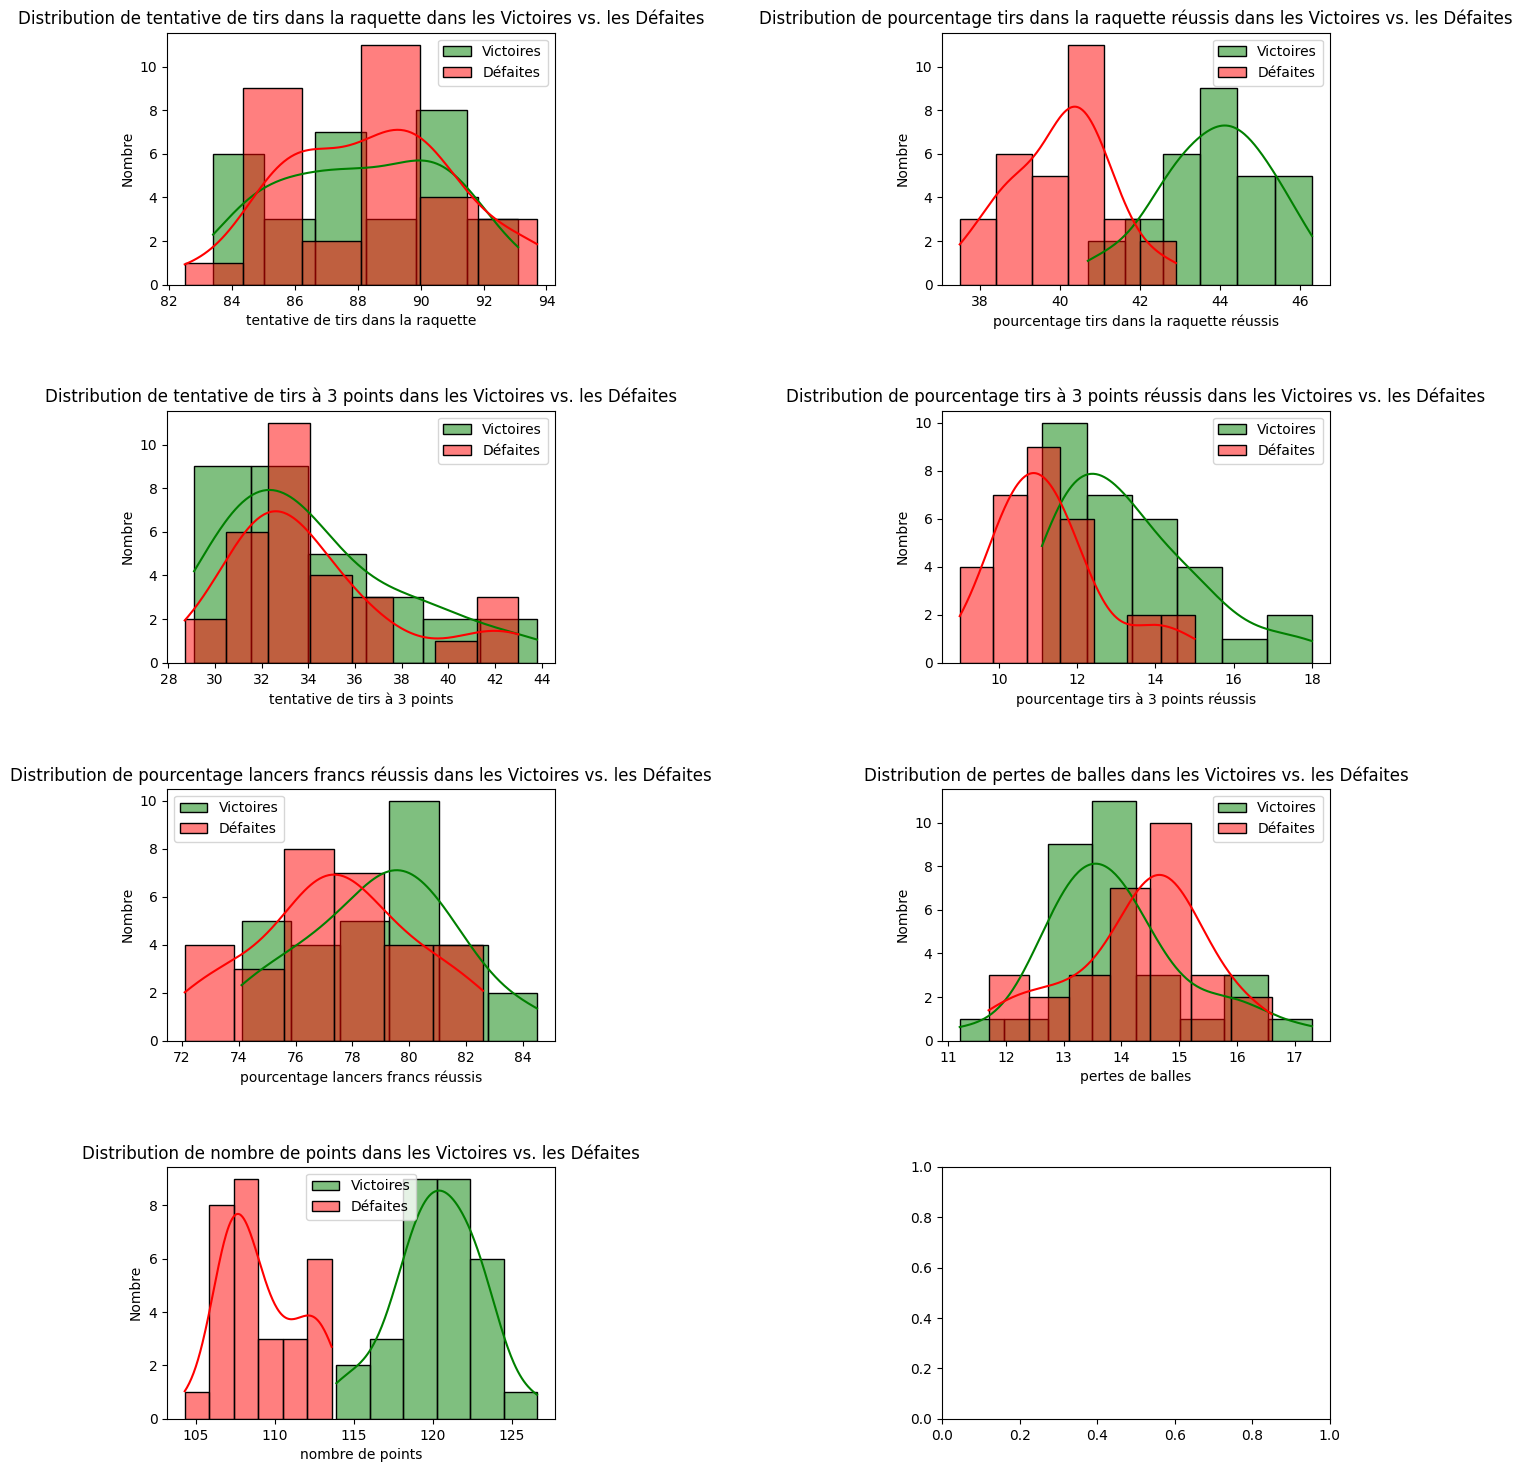

In [18]:
# Sélection des colonnes pour l'analyse
colonnes_a_comparer = ['FGA', 'FGM', '3PA', '3PM', 'FT%', 'TOV', 'PTS']
descriptions = {
    'FGA': 'tentative de tirs dans la raquette',
    'FGM': 'pourcentage tirs dans la raquette réussis',
    '3PA': 'tentative de tirs à 3 points',
    '3PM': 'pourcentage tirs à 3 points réussis',
    'FT%': 'pourcentage lancers francs réussis',
    'TOV': 'pertes de balles',
    'PTS': 'nombre de points'
}

# Création d'une figure avec plusieurs sous-graphiques disposés en 2 par 2
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 18))

# Ajustement de l'espacement entre les graphiques
plt.subplots_adjust(hspace=0.5, wspace=1)

# Visualisation avec Seaborn
for i, col in enumerate(colonnes_a_comparer):
    # Calcul des indices pour le placement des graphiques
    row_index = i // 2
    col_index = i % 2

    # Superposition des histogrammes pour les victoires et les défaites
    sns.histplot(data_teams['WINS.' + col], color='green', kde=True, label='Victoires', alpha=0.5, ax=axes[row_index, col_index])
    sns.histplot(data_teams['LOSSES.' + col], color='red', kde=True, label='Défaites', alpha=0.5, ax=axes[row_index, col_index])

    # Réglages des étiquettes et de la légende
    axes[row_index, col_index].set_title(f'Distribution de {descriptions[col]} dans les Victoires vs. les Défaites')
    axes[row_index, col_index].set_xlabel(descriptions[col])
    axes[row_index, col_index].set_ylabel('Nombre')
    axes[row_index, col_index].legend()

# Afficher le graphique
plt.show()

Ces graphiques permettent de comparer différentes statistiques en fonction de la victoire ou de la défaite. On peut voir notamment qu'en cas de défaites, les joueurs tirent plus dans la raquette mais ratent aussi plus de tires dans cette dernière. Les autres statistiques sont attendu, plus élévé en cas de victoire, mis à part pour les pertes de balles.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


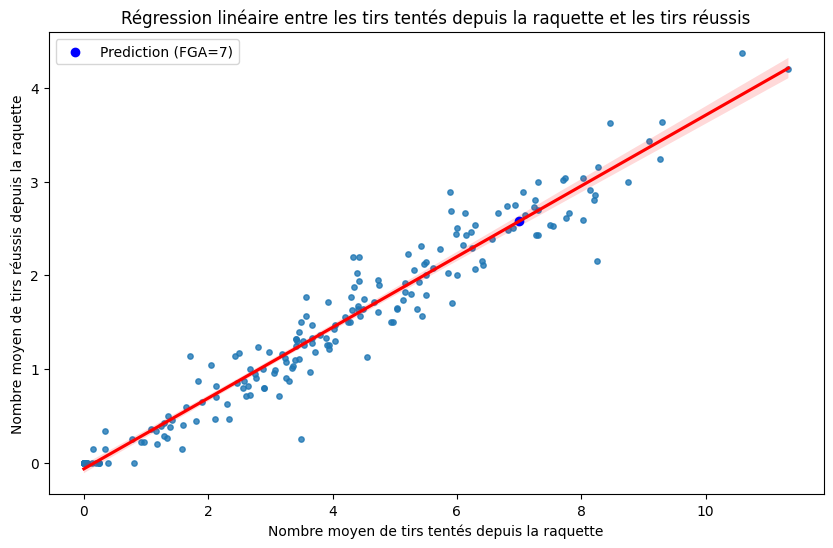

Estimation du nombre de panier mis depuis la raquette pour 7 tire depuis la raquette : 2.5767421996610986


In [7]:
# Calculer AVG_FGM et AVG_FGA
data_players['AVG_FGM'] = (data_players['WINS.FGM'] * data_players['WINS.GP'] +
                            data_players['LOSSES.FGM'] * data_players['LOSSES.GP']) / (data_players['WINS.GP'] + data_players['LOSSES.GP'])

data_players['AVG_FGA'] = (data_players['WINS.FGA'] * data_players['WINS.GP'] +
                            data_players['LOSSES.FGA'] * data_players['LOSSES.GP']) / (data_players['WINS.GP'] + data_players['LOSSES.GP'])

# Sélectionner les colonnes nécessaires pour la régression linéaire
data_reg = data_players[['AVG_FGA', 'AVG_FGM']].dropna()

# Diviser les données en variables indépendantes (X) et dépendantes (y)
x = data_reg[['AVG_FGA']]
y = data_reg['AVG_FGM']

# Initialiser le modèle de régression linéaire
model = LinearRegression()

# Ajuster le modèle aux données
model.fit(x, y)

# Faire une prédiction pour AVG_FGM avec AVG_FGA de 7
AVG_FGA_7 = 7
prediction_AVG_FGM = model.predict([[AVG_FGA_7]])

# Tracer le graphique avec Seaborn
plt.figure(figsize=(10, 6))
sns.regplot(x='AVG_FGA', y='AVG_FGM', data=data_players, scatter_kws={'s': 15}, line_kws={'color': 'red'})

# Ajouter une ligne pour la prédiction avec FGA de 7
plt.scatter([AVG_FGA_7], prediction_AVG_FGM, color='blue', marker='o', label='Prediction (FGA=7)')

# Ajouter des étiquettes et un titre
plt.xlabel('Nombre moyen de tirs tentés depuis la raquette')
plt.ylabel('Nombre moyen de tirs réussis depuis la raquette')
plt.title('Régression linéaire entre les tirs tentés depuis la raquette et les tirs réussis')

# Ajouter une légende
plt.legend()

# Afficher le graphique
plt.show()

# Afficher la prédiction
print(f"Estimation du nombre de panier mis depuis la raquette pour 7 tire depuis la raquette : {prediction_AVG_FGM[0]}")

Ce graphique nous permet de voir la courbe qui décrit le nombre de tirs mis dans la raquette en fonctione du nombre de tires tenté.

### Retours

Lors de ce projet, les principales difficultés que nous avons rencontré sont sur la partie scraping. Nous avons eu lors de la récupérations des données, des problème ne dépendant pas de notre code mais du site de la NBA. Pour régler ces problèmes, nous pouvons imaginer un un algorithe qui récupère les données et qui écrit dans le fichier csv au furet à mesure et qui nous permeterais de reprendre là où il s'est interrompu.
Nous pouvons aussi imaginer grâce à cette technique, récuprer des données sur plus d'une année qui nous permettrait d'avoir des données plus complètes.